In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

FILE='Nsymulations_dziedziczenie' 
TEST_RESULTS_MAIN_PATH='D:\\PythonProjects\\Alpha_gold\\data\\TEST_RESULTS\\'

path=Path(TEST_RESULTS_MAIN_PATH).joinpath(FILE+ '.json')

with open(path, 'r') as f:
    data = json.load(f)

print(data)
# data['0']=[(-1, 960), (-1, 1260), (-1, 1030), (-1, 3080), (-1, 1570), (-1, 1640), (-1, 2110), (-1, 2800), (-1, 1090), (-1, 3070), (-1, 1040), (-1, 2590), (-1, 2070), (-1, 1110), (1, 8980), (-1, 1070), (-1, 1040), (-1, 1110), (-1, 1530), (-1, 1250), (-1, 1560), (-1, 1470), (-1, 2000), (-1, 1460), (-1, 1400), (-1, 1140), (-1, 1420), (-1, 1400), (-1, 1540), (-1, 1950), (-1, 1320), (-1, 1510), (-1, 1740), (-1, 1350), (-1, 1300), (-1, 1930), (-1, 1080), (-1, 1490), (-1, 550), (-1, 1070), (-1, 1180), (-1, 3140), (-1, 1290), (-1, 1420), (-1, 1190), (-1, 1630), (-1, 1450), (-1, 1140), (-1, 1830), (-1, 880)]


df_list = []

for sim, values in data.items():
    for result, score in values:
        df_list.append({
            'Simulation': sim,
            'Result': result,
            'Score': score
        })

df = pd.DataFrame(df_list)


{'50': [[1, 13130], [1, 14650], [1, 11680], [1, 13780], [1, 13730], [1, 10870], [1, 9900], [1, 15700], [-1, 2860], [1, 12080], [1, 13160], [1, 13730], [1, 15700], [1, 14380], [1, 9800], [1, 13380], [1, 17010], [1, 6170], [1, 21060], [1, 16880], [1, 12860], [1, 18010], [1, 10980], [1, 12250], [1, 12200], [1, 15180], [1, 15680], [1, 13220], [1, 12240], [1, 15200], [1, 9060], [1, 17000], [1, 10260], [1, 15020], [1, 14720], [1, 19770], [1, 17170], [1, 15290], [1, 12650], [1, 14750], [1, 15160], [1, 12640], [1, 12800], [1, 12030], [1, 14700], [1, 12950], [1, 9910], [1, 12910], [1, 12340], [1, 10200], [1, 14500], [1, 16400], [1, 7210], [1, 10730], [1, 15260], [1, 10150], [1, 9620], [1, 17930], [1, 14670], [1, 21540], [1, 11730], [1, 14600], [1, 15220], [1, 18230], [1, 21470], [1, 7460], [1, 18090], [1, 12970], [1, 17070], [1, 9880], [1, 16670], [1, 11100], [1, 19750], [1, 12190], [1, 13120], [1, 15830], [1, 12180], [1, 14470], [1, 9470], [1, 22720], [1, 15200], [1, 15410], [1, 13870], [1, 10

In [50]:
# import json

# # Load the JSON data from a file
# with open('D:\PythonProjects\Alpha_gold\data\TEST_RESULTS\COLLECTIVE.json', 'r') as file:
#     data = json.load(file)

# # Prettify the JSON data
# prettified_data = json.dumps(data, indent=4, sort_keys=True)

# # Save the prettified JSON data back to the file
# with open('D:\PythonProjects\Alpha_gold\data\TEST_RESULTS\COLLECTIVE_NEW.json', 'w') as file:
#     file.write(prettified_data)
import sys
from modules.GoldStrike import GoldStrike
sys.path.append('D:\PythonProjects\Alpha_gold')



54

In [28]:
df['Simulation'] = df['Simulation'].astype(int)
# df = df[df['Simulation'] % 10 == 1]
df = df[df['Simulation'].isin([50,75,100,150,200])]
df

,Simulation,Result,Score
0,50,1,0.314259
1,50,1,0.360771
2,50,1,0.269890
3,50,1,0.334149
4,50,1,0.332619
...,...,...,...
745,200,1,0.527846
746,200,1,0.399939
747,200,1,0.323439
748,200,1,0.492350


In [23]:
# # !pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Score'] = scaler.fit_transform(df[['Score']])

In [24]:
summary = df.groupby('Simulation')['Result'].describe()
summary.index = summary.index.astype(int)
summary_sorted = summary.sort_index()
summary_sorted

,count,mean,std,min,25%,50%,75%,max
Simulation,,,,,,,,
50,200.0,0.99,0.141421,-1.0,1.0,1.0,1.0,1.0
55,200.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
75,200.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
100,200.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
101,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
125,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
150,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
151,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
200,50.0,0.96,0.282843,-1.0,1.0,1.0,1.0,1.0


In [25]:
summary = df.groupby('Simulation')['Score'].describe()
summary.index = summary.index.astype(int)
summary_sorted = summary.sort_index()
summary_sorted
# Filter out rows where 'Simulation' column values end with 1

,count,mean,std,min,25%,50%,75%,max
Simulation,,,,,,,,
50,200.0,0.340228,0.106118,0.000000,0.274862,0.332160,0.401545,0.630355
55,200.0,0.397107,0.096445,0.138923,0.334685,0.391677,0.462592,0.677785
75,200.0,0.375736,0.102030,0.138617,0.304697,0.366432,0.433905,0.734394
100,200.0,0.419108,0.115624,0.169217,0.334455,0.410649,0.489596,0.747858
101,50.0,0.493960,0.112783,0.213280,0.418069,0.506732,0.582849,0.697368
125,50.0,0.430838,0.100343,0.230722,0.352127,0.432987,0.493804,0.662791
150,50.0,0.434565,0.110007,0.151775,0.361460,0.435435,0.520884,0.676561
151,50.0,0.483164,0.095137,0.294982,0.403840,0.466187,0.558675,0.693390
200,50.0,0.442901,0.118112,0.008874,0.388846,0.460067,0.520731,0.686047


In [29]:
df = df

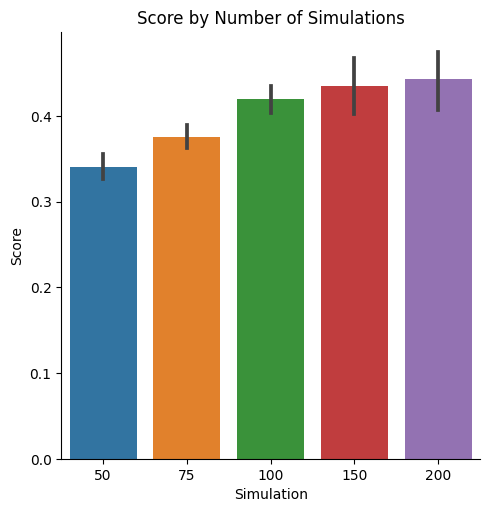

In [30]:
sns.catplot(x='Simulation', y='Score', data=df, kind='bar')
plt.title('Score by Number of Simulations')
plt.show()

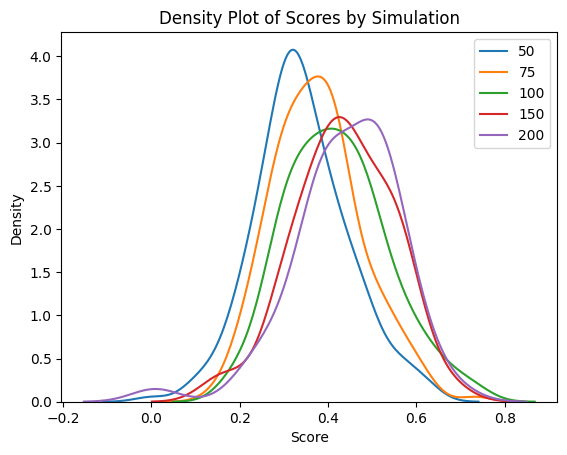

In [31]:
for sim in df['Simulation'].unique():
    sns.kdeplot(df[df['Simulation'] == sim]['Score'], label=sim)

plt.title('Density Plot of Scores by Simulation')
plt.legend()
plt.show()


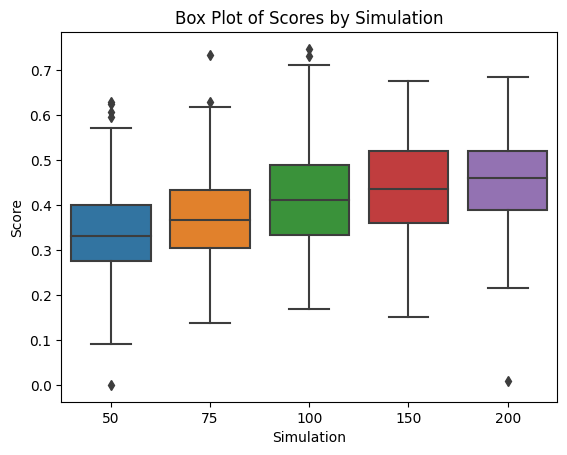

In [32]:
sns.boxplot(x='Simulation', y='Score', data=df)
plt.title('Box Plot of Scores by Simulation')
plt.show()


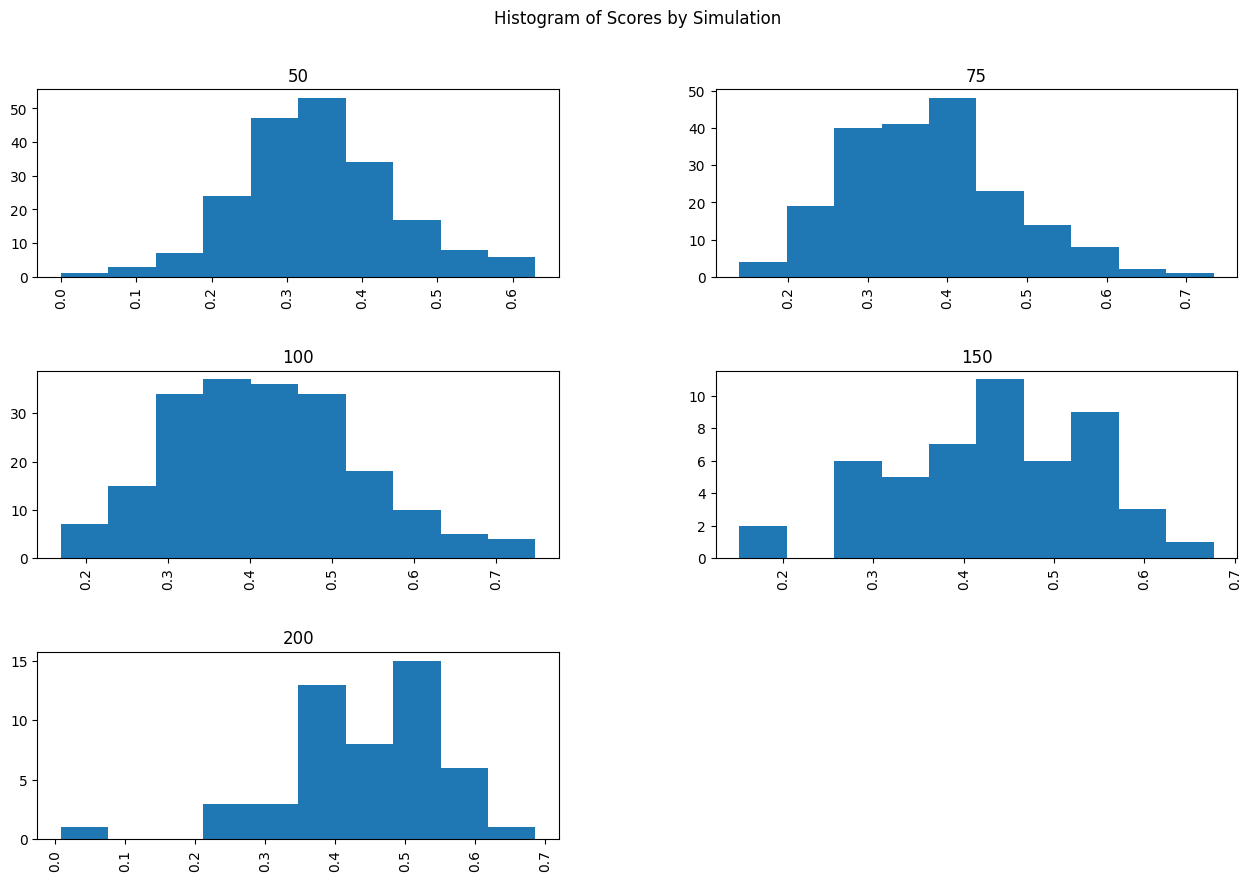

In [33]:

df['Score'].hist(by=df['Simulation'], bins=10, figsize=(15,10))
plt.suptitle('Histogram of Scores by Simulation')
plt.show()


In [ ]:
# correlation_matrix = df.T.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()


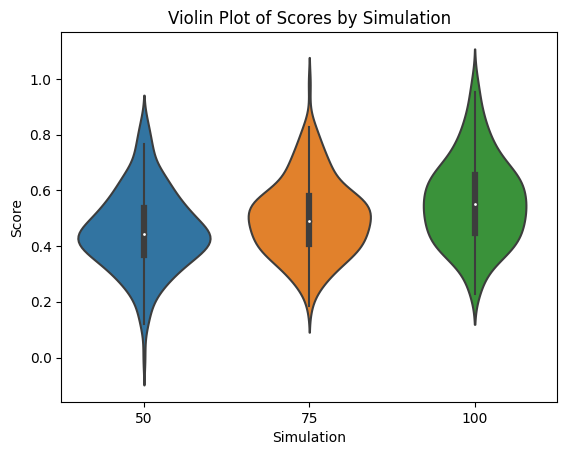

In [34]:
sns.violinplot(x='Simulation', y='Score', data=df)
plt.title('Violin Plot of Scores by Simulation')
plt.show()


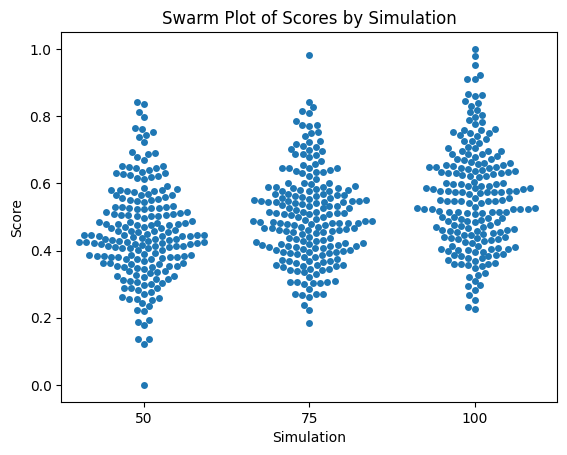

In [35]:
sns.swarmplot(x='Simulation', y='Score', data=df)
plt.title('Swarm Plot of Scores by Simulation')
plt.show()


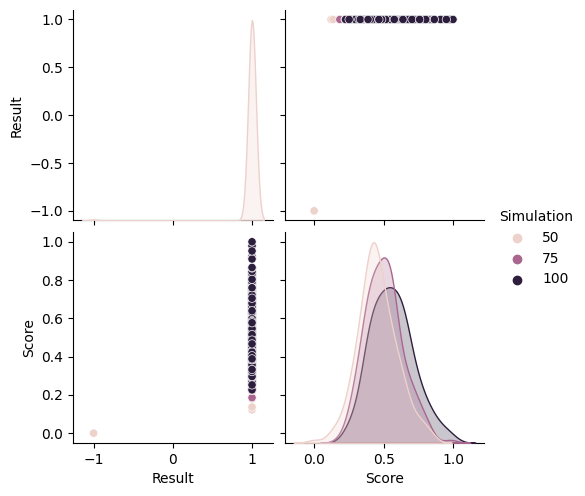

In [36]:
sns.pairplot(df, hue='Simulation')
plt.show()


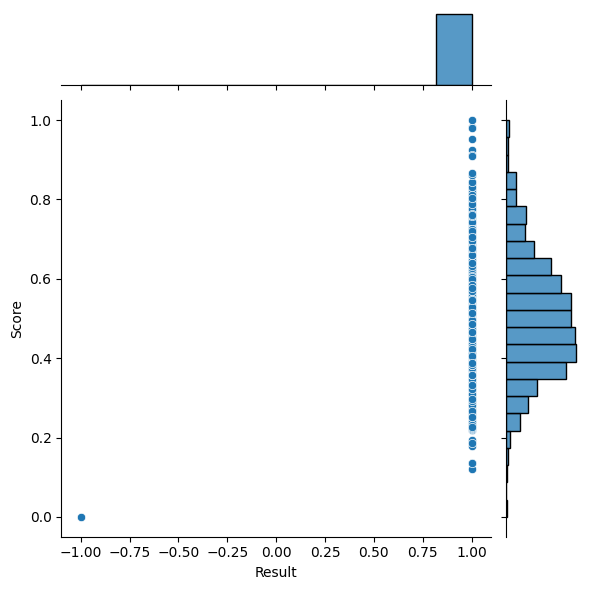

In [37]:
sns.jointplot(x='Result', y='Score', data=df, kind='scatter')
plt.show()
